In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
data = pd.read_csv("./fuel_econ.csv")
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [5]:
data.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


The function pointplot is good for comparing a quantative variable with a qualative variable.  Since we want to compare two quantative variables we need a different plot.  

We can't use the tabular data since it will try to plot connections between the points which doesn't make sense, so we need to massage the data again.  we need to sort the x values and only have 1 y value for each x value.

<Container object of 3 artists>

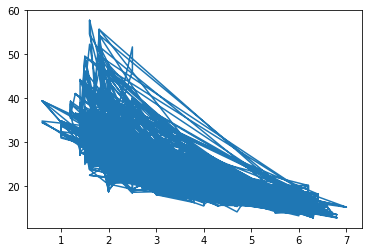

In [13]:
plt.errorbar(data = data, x = "displ", y = "comb");

Since the x-variable ('num_var1') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean. Note that the cut function call is different here than in the previous section, since we don't need to compute individual point weights.

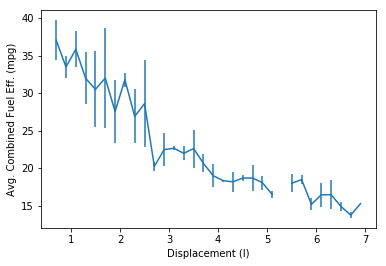

In [16]:
# set bin edges, compute centers
bins_edges = np.arange(0.6, 7 + 0.2, 0.2)
#here we are leaving out the last point since that won't correspond to a bin center
bins_centers = bins_edges[:-1] + 0.1 

# now use the cut function to figure out which bin each datapoint should be used in.
# include_lowest is to ensure that the min points of a bin are included. 
displ_binned = pd.cut(data["displ"], bins_edges, include_lowest = True)

# calculate the mean for the binned points.
comb_mean = data["comb"].groupby(displ_binned).mean()
# calculate the standard deviation for the binned points.
comb_std = data["comb"].groupby(displ_binned).std();

plt.errorbar(x = bins_centers, y = comb_mean, yerr = comb_std)
plt.xlabel("Displacement (l)")
plt.ylabel("Avg. Combined Fuel Eff. (mpg)");

# the gap is an area where there is no data.
# the standard deviation lines show the amount of variability of the fuel efficiencies. 